<a href="https://colab.research.google.com/github/FGalvao77/Fundamentos-de-Machine-Learning/blob/main/Fundamentos_de_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importando a biblioteca para modelagem de dados
import pandas as pd

In [ ]:
# instanciando os dados, utilizando a estrutura de um dicionário
dados = {'Nome': ['Maria', 'João', 'José', 'Carlos', 'Ana'], 
         'Idade': [54, 33, 29, 48, 21], 
         'Sexo': ['F', 'M', 'M', 'M', 'F'], 
         'Temperatura': [39.0, 38.7, 35.4, 36.0, 36.5], 
         'Dores': ['Sim', 'Não', 'Sim', 'Não', 'Sim'], 
         'Diagnóstico': ['Doente', 'Saudável', 'Saudável', 'Doente', 'Doente']}

# visualizando o dicionário criado
dados

{'Diagnóstico': ['Doente', 'Saudável', 'Saudável', 'Doente', 'Doente'],
 'Dores': ['Sim', 'Não', 'Sim', 'Não', 'Sim'],
 'Idade': [54, 33, 29, 48, 21],
 'Nome': ['Maria', 'João', 'José', 'Carlos', 'Ana'],
 'Sexo': ['F', 'M', 'M', 'M', 'F'],
 'Temperatura': [39.0, 38.7, 35.4, 36.0, 36.5]}

In [ ]:
# visualizando o tipo do objeto "dados"
type (dados)

dict

In [ ]:
# com o objeto "dados" iremos criar um dafaframe com o nome de "df"
df = pd.DataFrame(data=dados)

# visualizando o dataframe criado
df

,Nome,Idade,Sexo,Temperatura,Dores,Diagnóstico
0,Maria,54,F,39.0,Sim,Doente
1,João,33,M,38.7,Não,Saudável
2,José,29,M,35.4,Sim,Saudável
3,Carlos,48,M,36.0,Não,Doente
4,Ana,21,F,36.5,Sim,Doente


In [ ]:
# visualizando o tipo do obejto "df"
type (df)

pandas.core.frame.DataFrame

In [ ]:
# estatísticas descritivas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Idade,5.0,37.00,13.656500,21.0,29.0,33.0,48.0,54.0
Temperatura,5.0,37.12,1.630031,35.4,36.0,36.5,38.7,39.0


In [ ]:
# visualizando a ocorrência e suas respectivas frequências de dados do tipo "object"
df.describe(include='O')

,Nome,Sexo,Dores,Diagnóstico
count,5,5,5,5
unique,5,2,2,2
top,José,M,Sim,Doente
freq,1,3,3,3


In [ ]:
# visualizando a correlação entre as variáveis numéricas
df.corr()

,Idade,Temperatura
Idade,1.000000,0.415534
Temperatura,0.415534,1.000000


In [ ]:
# criando uma cópia do dataframe para não sobreescrever o original
df_copia = df.copy()

In [ ]:
# eliminando a coluna "Nome" do dataframe
df_copia = df_copia.drop('Nome', axis=1)

# convertendo as variáveis categóricas para variávies númericas
for col in df_copia.select_dtypes(include='object').columns:
  df_copia[col] = df_copia[col].astype('category')

  # imprimindo o mapeamento
  print(col, '\t', dict(enumerate(df_copia[col].cat.categories)), end='\n\n')

  df_copia[col] = df_copia[col].cat.codes

Sexo 	 {0: 'F', 1: 'M'}

Dores 	 {0: 'Não', 1: 'Sim'}

Diagnóstico 	 {0: 'Doente', 1: 'Saudável'}



In [ ]:
# visualizando o dataframe após o tratamento das variáveis categóricas
df_copia

,Idade,Sexo,Temperatura,Dores,Diagnóstico
0,54,0,39.0,1,0
1,33,1,38.7,0,1
2,29,1,35.4,1,1
3,48,1,36.0,0,0
4,21,0,36.5,1,0


In [ ]:
# do sklearn e do módulo "linear_model" importando "LinearRegression"
from sklearn.linear_model import LinearRegression

# instanciando o modelo
linearReg = LinearRegression()

In [ ]:
# instanciando a variável explicativa - X, nesse caso utilizarei a "Idade"
# e a variável resposta - y, o nosso alvo que é "Diagnóstico"

X = df_copia['Idade'].values.reshape(-1,1) # ajustando os dados
y = df_copia['Diagnóstico'].values.reshape(-1,1)

# visualizando o tipo de dados das variáveis "X" e "y"
type (X), type (y)

(numpy.ndarray, numpy.ndarray)

In [ ]:
# visualizando os dados da variável "X"
X

array([[54],
       [33],
       [29],
       [48],
       [21]])

In [ ]:
# visualizando os dados da variável "y"
y

array([[0],
       [1],
       [1],
       [0],
       [0]], dtype=int8)

In [ ]:
# treinando o modelo aos dados
linearReg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# realizando as predições
y_pred = linearReg.predict(X)
y_pred

array([[0.12654155],
       [0.46434316],
       [0.52868633],
       [0.2230563 ],
       [0.65737265]])

In [ ]:
# criando uma função para retornar o cálculo do erro médio quadratico

def MSE(y, y_pred): # MSE - mean squared error
    '''
    O cálculo do erro médio quadrático se dá pelo valor real 
    da variável alvo (y) subtraindo o valor predito (y_pred)
    elevando os resultados ao quadrado e por fim,
    somando-os e extraindo a média dos elementos
    '''
    return ((y - y_pred)**2).mean()

In [ ]:
# visualizando o MSE
MSE(y = y, y_pred = y_pred)

0.2013941018766756

In [ ]:
# criando uma função para calcular a raiz do erro médio quadrático

def RMSE(y, y_pred):    # RMSE - root mean squared error
    '''
    Função para calcular a raiz do erro médio quadrático
    '''
    return ((y - y_pred)**2).mean() ** 0.5

# visualizando o RMSE
RMSE(y = y, y_pred = y_pred)

0.44876954205546926

In [ ]:
# para facilitar, dentro do sklearn existe já funções prontas que cálcula as métricas de avaliação 

# importando as métricas de avaliação
from sklearn.metrics import mean_squared_error, r2_score 

In [ ]:
# visualizando os coeficientes do modelo
print('Coeficientes:\n', linearReg.coef_)

# visualizando o erro médio quadrático
print('\nErro médio quadrático:\n', mean_squared_error(y, y_pred))

# visualizando o coeficiente de determinação
print('\nCoeficiente de determinação:\n', r2_score(y, y_pred))

Coeficientes:
 [[-0.01608579]]

Erro médio quadrático:
 0.2013941018766756

Coeficiente de determinação:
 0.1608579088471851


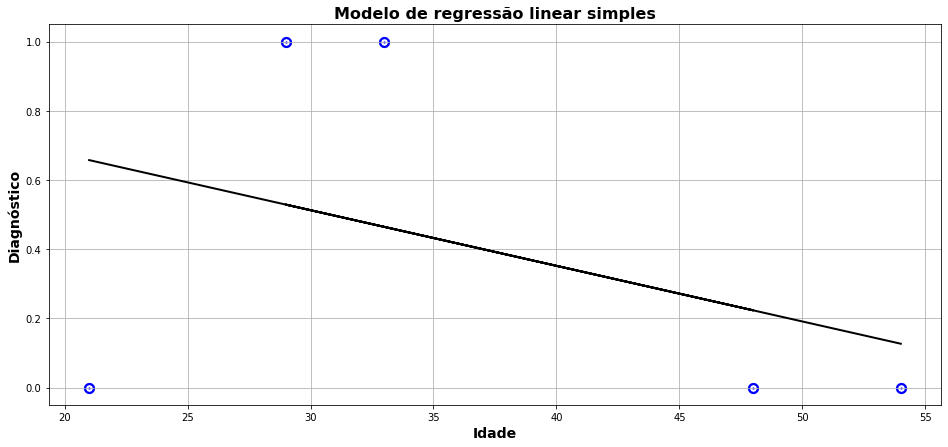

In [ ]:
import matplotlib.pyplot as plt

# plotando o gráfico de dispersão e a reta da regressão
plt.figure(figsize=[16,7])
plt.title('Modelo de regressão linear simples', 
          fontweight = 'bold', fontsize = 16)
plt.scatter(X, y, s = 5, c = 'blue', linewidth=9)
plt.xlabel('Idade', fontweight = 'bold', fontsize = 14)
plt.ylabel('Diagnóstico', fontweight = 'bold', fontsize = 14)
plt.xticks()

plt.plot(X, y_pred, c = 'black', lw = 2)
plt.grid()

# <font color='orange'>**Regressão linear**</font>

---



## <font color='green'>**diabetes**<font>

In [ ]:
# immportando as bibliotecas
import numpy as np                                  # para modelagem de dados
from sklearn.datasets import load_diabetes          # importando o dataset diabetes
from sklearn.linear_model import LinearRegression   # importando a função de regressão linear
from sklearn.metrics import (mean_squared_error,    # importando as métricas de avaliação
                             r2_score)
import matplotlib.pyplot as plt                     # para visualização gráfica

%matplotlib inline

In [ ]:
# carregando o conjunto de dados na variável "diabetes"
diabetes = load_diabetes()

# visualizando informações gerais sobre o conjunto de dados
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [ ]:
# visualizando o target
diabetes.target[:20]    # 20 primeiros dados

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.])

In [ ]:
# instanciando as variáveis "X" (explicativas) e "y" (alvo)
X, y = load_diabetes(return_X_y=True)

In [ ]:
# usaremos somente uma coluna, nesse caso a "Body mass"
X = X[:, np.newaxis, 2]

In [ ]:
# visualizando o tamanho das variáveis "X" e "y"
X.shape, y.shape

((442, 1), (442,))

In [ ]:
# calculando 25% em relação ao total do conjunto de dados
X.shape[0] * .25

110.5

In [ ]:
# dividindo as variáveis "X" e "y" em treino e teste - 25% dos dados
X_train, X_test = X[:-110], X[-110:]
y_train, y_test = y[:-110], y[-110:]

In [ ]:
# visualizando o tamanho dos conjuntos de dados de treino e teste
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((332, 1), (110, 1), (332,), (110,))

In [ ]:
# instanciando o modelo de regressão
regr = LinearRegression()

In [ ]:
# realizando o treinamento do modelo com os dados de treino
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# realizando as predições com o modelo treinado
y_pred = regr.predict(X_test)

In [ ]:
# visualizando os coeficientes do modelo
print('Coeficientes:\n', regr.coef_)

# visualizando o erro médio quadrático
print('\nErro médio quadrático:\n', mean_squared_error(y_test, y_pred))

# visualizando o coeficiente de determinação
print('\nCoeficiente de determinação:\n', r2_score(y_test, y_pred))

Coeficientes:
 [938.93661435]

Erro médio quadrático:
 3685.296949653315

Coeficiente de determinação:
 0.4032552778073586


In [ ]:
# criando uma função para calcular a raiz do erro médio quadrático
def RMSE(y_test, y_pred):
    import numpy as np
    return np.sqrt(np.mean((y_test - y_pred)**2))

# visualizando o RMSE - raiz do erro médio quadrático
RMSE(y_test = y_test, y_pred = y_pred)

60.70664666783461

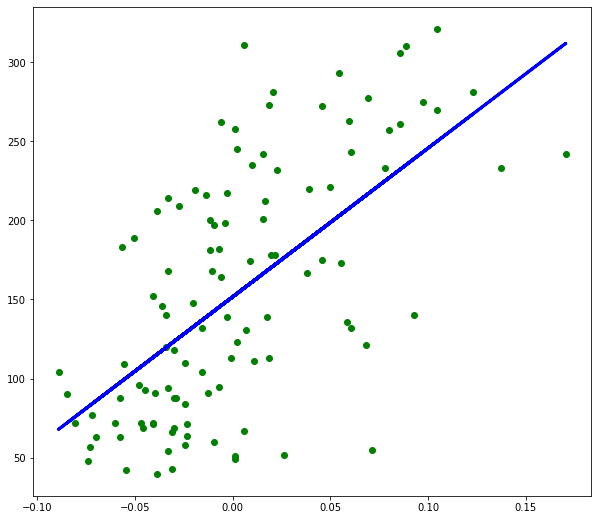

In [ ]:
# plotando gráfico de dispersão
plt.figure(figsize=(10,9))
plt.scatter(X_test, y_test, color='green')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xticks()
plt.yticks()
plt.show();

# <font color='orange'>**Máquinas de Vetores de Suporte para classificação**</font>

---



## <font color='green'>**iris**</font>

In [ ]:
# importando as bibliotecas
import numpy as np                      # para modelagem de dados
from sklearn.datasets import load_iris  # importando o conjunto de dados
from sklearn.svm import SVC, LinearSVC  # importando o classificador
import matplotlib.pyplot as plt         # para visualização gráfica

%matplotlib inline

In [ ]:
def make_meshgrid(x, y, h=.02):
    '''
    Criando uma função para plotar uma malha de pontos

    Parâmetros:
    - x: dados para basear a grade de malha do eixo x
    - y: dados para basear a grade de malha do eixo y
    - h: tamanho do passo da grade de malha (opcional)

    Retorno:
     xx, yy : ndarray
    '''

    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
                         np.arange(y_min, y_max, h))
     
    return xx, yy

In [ ]:
def plot_contours(ax, clf, xx, yy, **params):
    '''
    Função para plotar os limites de decisão para o classificador

    Parâmetros:
    - ax: objeto dos eixos
    - clf: classificador
    - xx: meshgrid ndarray
    - yy: meshgrid ndarray
    - params: dicionário de parâmetros para passar o contourf (opcional)
    '''

    Z = clf.predict(np.c_[xx.ravel(), 
                          yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)

    return out

In [ ]:
# instanciando o conjunto de dados
iris = load_iris()

# visualizando informações gerais sobre o conjunto de dados
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
# instanciando as variáveis explicativas e a variável alvo

# variáveis explicativas
X = iris.data[:, :2]  # iremos utilizar somente as duas primeiras colunas

# variável resposta (alvo)
y = iris.target

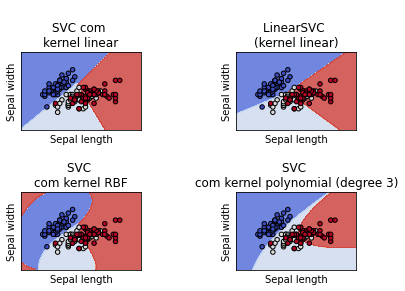

In [ ]:
# instanciando o SVM e ajustando os dados
# não escalamos os dados, pois queremos plotar os vetores de suporte

C = 1.0 # parâmetro de regularização do SVM

models = (SVC(kernel='linear', C=C),
          LinearSVC(C=C, max_iter=10_000),
          SVC(kernel='rbf', gamma=0.7, C=C),
          SVC(kernel='poly', degree=3, gamma='auto', C=C))

models = (clf.fit(X, y) for clf in models)

# título dos gráficos
titles = ('\nSVC com \nkernel linear', 
           '\nLinearSVC \n(kernel linear)', 
           '\nSVC \ncom kernel RBF', 
           '\nSVC \ncom kernel polynomial (degree 3)')

# configurando a grade de plotagem 2 por 2
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.8, hspace=0.8)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show();

## <font color='green'>**wine**</font>

In [ ]:
from sklearn.datasets import load_wine  # importando o conjunto de dados

# instanciando o conjunto de dados
wine = load_wine()

# visualizando informações gerais sobre o conjunto de dados
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [ ]:
# instanciando as variáveis explicativas e a variável alvo

# variáveis explicativas
X = wine.data[:, :2]  # iremos utilizar somente as duas primeiras colunas

# variável resposta (alvo)
y = wine.target

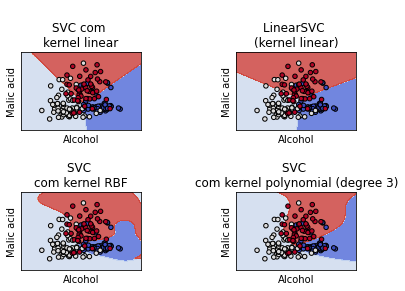

In [ ]:
# instanciando o SVM e ajustando os dados
# não escalamos os dados, pois queremos plotar os vetores de suporte

C = 1.0 # parâmetro de regularização do SVM

models = (SVC(kernel='linear', C=C),
          LinearSVC(C=C, max_iter=10_000),
          SVC(kernel='rbf', gamma=0.7, C=C),
          SVC(kernel='poly', degree=3, gamma='auto', C=C))

models = (clf.fit(X, y) for clf in models)

# título dos gráficos
titles = ('\nSVC com \nkernel linear', 
           '\nLinearSVC \n(kernel linear)', 
           '\nSVC \ncom kernel RBF', 
           '\nSVC \ncom kernel polynomial (degree 3)')

# configurando a grade de plotagem 2 por 2
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.8, hspace=0.8)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Alcohol')
    ax.set_ylabel('Malic acid')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show();